# Лабораторная 2. Решение СЛАУ различными методами (пункт г).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
n = 100
A = np.zeros((n, n))
F = np.zeros((n, 1))

for i in range(0, n):
    if (i == 0):
        for j in range(0, n):
            A[0, j] = 1
        continue 

    if (i == n - 1):
        A[n - 1, n - 2] = 1
        A[n - 1, n - 1] = 1
        continue

    A[i, i - 1] = 1
    A[i, i    ] = 10
    A[i, i + 1] = 1

for i in range(0, n):
    F[i, 0] = n - i

print(A)
print(F)

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1. 10.  1. ...  0.  0.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  1.  0.]
 [ 0.  0.  0. ...  1. 10.  1.]
 [ 0.  0.  0. ...  0.  1.  1.]]
[[100.]
 [ 99.]
 [ 98.]
 [ 97.]
 [ 96.]
 [ 95.]
 [ 94.]
 [ 93.]
 [ 92.]
 [ 91.]
 [ 90.]
 [ 89.]
 [ 88.]
 [ 87.]
 [ 86.]
 [ 85.]
 [ 84.]
 [ 83.]
 [ 82.]
 [ 81.]
 [ 80.]
 [ 79.]
 [ 78.]
 [ 77.]
 [ 76.]
 [ 75.]
 [ 74.]
 [ 73.]
 [ 72.]
 [ 71.]
 [ 70.]
 [ 69.]
 [ 68.]
 [ 67.]
 [ 66.]
 [ 65.]
 [ 64.]
 [ 63.]
 [ 62.]
 [ 61.]
 [ 60.]
 [ 59.]
 [ 58.]
 [ 57.]
 [ 56.]
 [ 55.]
 [ 54.]
 [ 53.]
 [ 52.]
 [ 51.]
 [ 50.]
 [ 49.]
 [ 48.]
 [ 47.]
 [ 46.]
 [ 45.]
 [ 44.]
 [ 43.]
 [ 42.]
 [ 41.]
 [ 40.]
 [ 39.]
 [ 38.]
 [ 37.]
 [ 36.]
 [ 35.]
 [ 34.]
 [ 33.]
 [ 32.]
 [ 31.]
 [ 30.]
 [ 29.]
 [ 28.]
 [ 27.]
 [ 26.]
 [ 25.]
 [ 24.]
 [ 23.]
 [ 22.]
 [ 21.]
 [ 20.]
 [ 19.]
 [ 18.]
 [ 17.]
 [ 16.]
 [ 15.]
 [ 14.]
 [ 13.]
 [ 12.]
 [ 11.]
 [ 10.]
 [  9.]
 [  8.]
 [  7.]
 [  6.]
 [  5.]
 [  4.]
 [  3.]
 [  2.]
 [  1.]]


In [4]:
def gauss_elimination(A, F):
    """
    Реализует метод Гаусса с выбором главного элемента для системы вида AU = F.

    Args:
        A: Матрица коэффициентов системы (numpy.matrix).
        F: Вектор свободных членов (numpy.matrix).

    Returns:
        Вектор решений системы (numpy.matrix) или None, если система не имеет решений.
    """

    n = A.shape[0]
    augmented_matrix = np.concatenate((A, F), axis=1) # Расширенная матрица

    for i in range(n):
        # Поиск главного элемента в матрице
        max_index = np.argmax(np.abs(augmented_matrix[i:, i])) + i
        
        # Перестановка строк
        augmented_matrix[[i, max_index], :] = augmented_matrix[[max_index, i], :]

        # Проверка на нулевой главный элемент
        if augmented_matrix[i, i] == 0:
            return None # Система не имеет решений

        # Нормализация строки
        augmented_matrix[i, :] /= augmented_matrix[i, i]

        # Обнуление элементов ниже главного элемента
        for j in range(i + 1, n):
            augmented_matrix[j, :] -= augmented_matrix[i, :] * augmented_matrix[j, i]

    # Обратный ход
    U = np.zeros((n, 1))

    for i in range(n - 1, -1, -1):
        U[i, 0] = augmented_matrix[i, n]
        for j in range(i - 1, -1, -1):
            augmented_matrix[j, n] -= augmented_matrix[j, i] * U[i, 0]

    return U

In [5]:
u = gauss_elimination(A, F)

print(np.dot(A, u))

[[100.]
 [ 99.]
 [ 98.]
 [ 97.]
 [ 96.]
 [ 95.]
 [ 94.]
 [ 93.]
 [ 92.]
 [ 91.]
 [ 90.]
 [ 89.]
 [ 88.]
 [ 87.]
 [ 86.]
 [ 85.]
 [ 84.]
 [ 83.]
 [ 82.]
 [ 81.]
 [ 80.]
 [ 79.]
 [ 78.]
 [ 77.]
 [ 76.]
 [ 75.]
 [ 74.]
 [ 73.]
 [ 72.]
 [ 71.]
 [ 70.]
 [ 69.]
 [ 68.]
 [ 67.]
 [ 66.]
 [ 65.]
 [ 64.]
 [ 63.]
 [ 62.]
 [ 61.]
 [ 60.]
 [ 59.]
 [ 58.]
 [ 57.]
 [ 56.]
 [ 55.]
 [ 54.]
 [ 53.]
 [ 52.]
 [ 51.]
 [ 50.]
 [ 49.]
 [ 48.]
 [ 47.]
 [ 46.]
 [ 45.]
 [ 44.]
 [ 43.]
 [ 42.]
 [ 41.]
 [ 40.]
 [ 39.]
 [ 38.]
 [ 37.]
 [ 36.]
 [ 35.]
 [ 34.]
 [ 33.]
 [ 32.]
 [ 31.]
 [ 30.]
 [ 29.]
 [ 28.]
 [ 27.]
 [ 26.]
 [ 25.]
 [ 24.]
 [ 23.]
 [ 22.]
 [ 21.]
 [ 20.]
 [ 19.]
 [ 18.]
 [ 17.]
 [ 16.]
 [ 15.]
 [ 14.]
 [ 13.]
 [ 12.]
 [ 11.]
 [ 10.]
 [  9.]
 [  8.]
 [  7.]
 [  6.]
 [  5.]
 [  4.]
 [  3.]
 [  2.]
 [  1.]]


In [6]:
def lu_decomposition(A, F):
    """
    Реализует метод LU разложения для решения системы вида Au = F.

    Args:
        A: Матрица коэффициентов системы (numpy.ndarray).
        F: Вектор свободных членов (numpy.ndarray).

    Returns:
        Вектор решений системы (numpy.ndarray) или None, если метод LU не применим.
    """

    n = A.shape[0]

    L = np.eye(n)   # Нижняя треугольная матрица (единичная по диагонали)
    U = A.copy()    # Верхняя треугольная матрица (изначально равна A)

    # LU разложение
    for i in range(n):
        # Поиск ведущего элемента в столбце
        pivot = U[i, i]
        if pivot == 0:
            return None # Метод LU не применим

        # Нормализация строки
        U[i, :] /= pivot
        L[i, i] = pivot

        # Обнуление элементов ниже ведущего элемента
        for j in range(i + 1, n):
            factor = U[j, i]
            U[j, :] -= factor * U[i, :]
            L[j, i] = factor

    # Дальше получаются две треугольные матрицы, которые легко решаются

    # Решение системы Ly = F
    y = np.zeros_like(F)

    for i in range(n):
        y[i] = F[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]
        y[i] /= L[i, i]

    # Решение системы Ux = y
    x = np.zeros_like(F)

    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i, j] * x[j] 
        x[i] /= U[i, i]

    return x

In [7]:
u = lu_decomposition(A, F)

print(np.dot(A, u))

[[100.]
 [ 99.]
 [ 98.]
 [ 97.]
 [ 96.]
 [ 95.]
 [ 94.]
 [ 93.]
 [ 92.]
 [ 91.]
 [ 90.]
 [ 89.]
 [ 88.]
 [ 87.]
 [ 86.]
 [ 85.]
 [ 84.]
 [ 83.]
 [ 82.]
 [ 81.]
 [ 80.]
 [ 79.]
 [ 78.]
 [ 77.]
 [ 76.]
 [ 75.]
 [ 74.]
 [ 73.]
 [ 72.]
 [ 71.]
 [ 70.]
 [ 69.]
 [ 68.]
 [ 67.]
 [ 66.]
 [ 65.]
 [ 64.]
 [ 63.]
 [ 62.]
 [ 61.]
 [ 60.]
 [ 59.]
 [ 58.]
 [ 57.]
 [ 56.]
 [ 55.]
 [ 54.]
 [ 53.]
 [ 52.]
 [ 51.]
 [ 50.]
 [ 49.]
 [ 48.]
 [ 47.]
 [ 46.]
 [ 45.]
 [ 44.]
 [ 43.]
 [ 42.]
 [ 41.]
 [ 40.]
 [ 39.]
 [ 38.]
 [ 37.]
 [ 36.]
 [ 35.]
 [ 34.]
 [ 33.]
 [ 32.]
 [ 31.]
 [ 30.]
 [ 29.]
 [ 28.]
 [ 27.]
 [ 26.]
 [ 25.]
 [ 24.]
 [ 23.]
 [ 22.]
 [ 21.]
 [ 20.]
 [ 19.]
 [ 18.]
 [ 17.]
 [ 16.]
 [ 15.]
 [ 14.]
 [ 13.]
 [ 12.]
 [ 11.]
 [ 10.]
 [  9.]
 [  8.]
 [  7.]
 [  6.]
 [  5.]
 [  4.]
 [  3.]
 [  2.]
 [  1.]]


In [8]:
def plot_r(r_arr, method_name):
    plt.figure(figsize=[8, 4])

    plt.plot(range(1, len(r_arr) + 1), r_arr)
    plt.xlabel("Итерация")
    plt.ylabel("Невязка")
    plt.title("Зависимость невязки от итерации, " + method_name)
    plt.grid(True)
    plt.show()

In [9]:
def get_D_L_U(A):
    n = A.shape[0]
    D = np.zeros_like(A)
    L = np.zeros_like(A)
    U = np.zeros_like(A)

    for i in range(n):
        D[i, i] = A[i, i]
        L[i, :i] = A[i, :i]
        U[i, i+1:] = A[i, i+1:]

    return D, L, U

In [10]:
def jacobi(A, F, u0, eps=1e-6, max_iter=100):
    """
    Реализует метод Якоби для решения системы Au = F.

    Args:
        A:          Матрица коэффициентов системы (numpy.ndarray).
        F:          Вектор свободных членов (numpy.ndarray).
        u0:         Начальное приближение к решению.
        tol:        Точность, с которой ищется решение.
        max_iter:   Максимальное количество итераций.

    Returns:
        Вектор решений системы (numpy.ndarray) или None.
        Количество выполненных итераций.
    """

    n = A.shape[0]
    u = u0.copy()

    D, L, U = get_D_L_U(A)
    D_inv = np.linalg.inv(D)

    r_arr = []

    for k in range(max_iter):
        r = F - np.dot(A, u)
        r_arr.append(np.linalg.norm(r))
        
        u_prev = u.copy()
        u = - np.dot(np.dot(D_inv, (L + U)), u_prev) + np.dot(D_inv, F)
            
        if np.linalg.norm(u - u_prev) < eps:
            break
        
    plot_r(r_arr, "Метод Якоби")

    return u, k

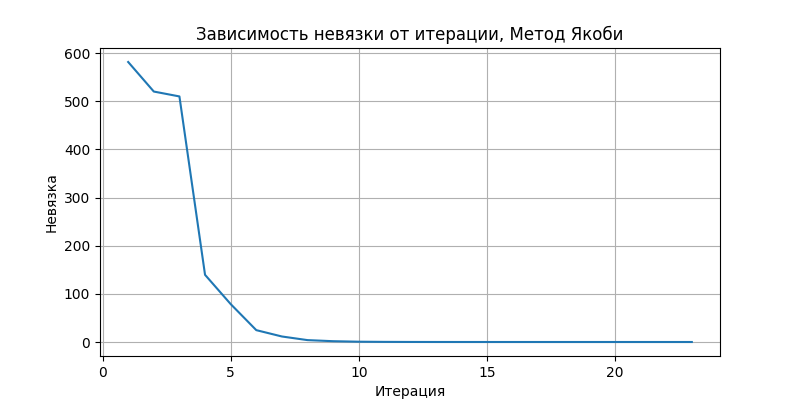

[[100.00000034]
 [ 99.00000094]
 [ 98.00000026]
 [ 97.00000007]
 [ 96.00000002]
 [ 95.00000001]
 [ 94.        ]
 [ 93.        ]
 [ 92.        ]
 [ 91.        ]
 [ 90.        ]
 [ 89.        ]
 [ 88.        ]
 [ 87.        ]
 [ 86.        ]
 [ 85.        ]
 [ 84.        ]
 [ 83.        ]
 [ 82.        ]
 [ 81.        ]
 [ 80.        ]
 [ 79.        ]
 [ 78.        ]
 [ 77.        ]
 [ 76.        ]
 [ 75.        ]
 [ 74.        ]
 [ 73.        ]
 [ 72.        ]
 [ 71.        ]
 [ 70.        ]
 [ 69.        ]
 [ 68.        ]
 [ 67.        ]
 [ 66.        ]
 [ 65.        ]
 [ 64.        ]
 [ 63.        ]
 [ 62.        ]
 [ 61.        ]
 [ 60.        ]
 [ 59.        ]
 [ 58.        ]
 [ 57.        ]
 [ 56.        ]
 [ 55.        ]
 [ 54.        ]
 [ 53.        ]
 [ 52.        ]
 [ 51.        ]
 [ 50.        ]
 [ 49.        ]
 [ 48.        ]
 [ 47.        ]
 [ 46.        ]
 [ 45.        ]
 [ 44.        ]
 [ 43.        ]
 [ 42.        ]
 [ 41.        ]
 [ 40.        ]
 [ 39.        ]
 [ 38.  

In [11]:
u0 = np.zeros((n, 1))
u, k = jacobi(A, F, u0)

print(np.dot(A, u), k)

In [12]:
def seidel(A, F, u0, eps=1e-6, max_iter=100):
    """
    Реализует метод Зейделя для решения системы Au = F.

    Args:
        A:          Матрица коэффициентов системы (numpy.ndarray).
        F:          Вектор свободных членов (numpy.ndarray).
        u0:         Начальное приближение к решению.
        eps:        Точность, с которой ищется решение.
        max_iter:   Максимальное количество итераций.

    Returns:
        Вектор решений системы (numpy.ndarray) или None.
        Количество выполненных итераций.
    """

    n = A.shape[0]
    u = u0.copy()

    r_arr = []

    D, L, U = get_D_L_U(A)
    L_plus_D_inv = np.linalg.inv(L + D)

    for k in range(max_iter):
        r = F - np.dot(A, u)
        r_arr.append(np.linalg.norm(r))

        u_prev = u.copy()
        u = - np.dot(np.dot(L_plus_D_inv, U), u_prev) + np.dot(L_plus_D_inv, F)

        if np.linalg.norm(u - u_prev) < eps:
            break

    plot_r(r_arr, "Метод Зейделя")

    return u, k

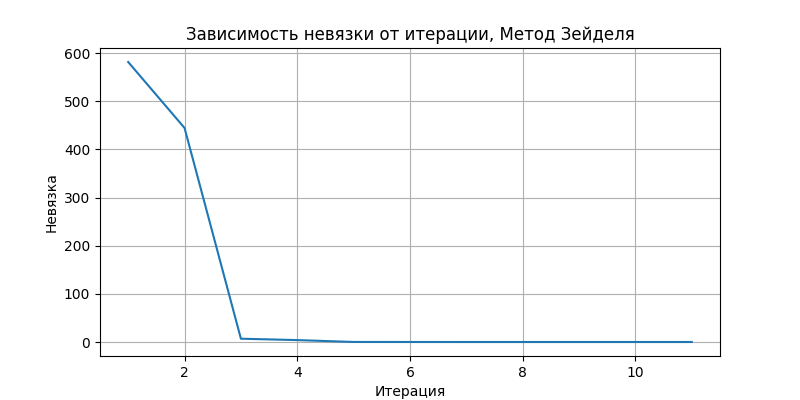

[[100.00000003]
 [ 99.        ]
 [ 98.        ]
 [ 97.        ]
 [ 96.        ]
 [ 95.        ]
 [ 94.        ]
 [ 93.        ]
 [ 92.        ]
 [ 91.        ]
 [ 90.        ]
 [ 89.        ]
 [ 88.        ]
 [ 87.        ]
 [ 86.        ]
 [ 85.        ]
 [ 84.        ]
 [ 83.        ]
 [ 82.        ]
 [ 81.        ]
 [ 80.        ]
 [ 79.        ]
 [ 78.        ]
 [ 77.        ]
 [ 76.        ]
 [ 75.        ]
 [ 74.        ]
 [ 73.        ]
 [ 72.        ]
 [ 71.        ]
 [ 70.        ]
 [ 69.        ]
 [ 68.        ]
 [ 67.        ]
 [ 66.        ]
 [ 65.        ]
 [ 64.        ]
 [ 63.        ]
 [ 62.        ]
 [ 61.        ]
 [ 60.        ]
 [ 59.        ]
 [ 58.        ]
 [ 57.        ]
 [ 56.        ]
 [ 55.        ]
 [ 54.        ]
 [ 53.        ]
 [ 52.        ]
 [ 51.        ]
 [ 50.        ]
 [ 49.        ]
 [ 48.        ]
 [ 47.        ]
 [ 46.        ]
 [ 45.        ]
 [ 44.        ]
 [ 43.        ]
 [ 42.        ]
 [ 41.        ]
 [ 40.        ]
 [ 39.        ]
 [ 38.  

In [13]:
u0 = np.zeros((n, 1))
u, k = seidel(A, F, u0)

print(np.dot(A, u), k)

In [14]:
def sor(A, F, u0, w=0.5, eps=1e-6, max_iter=100):
    """
    Реализует метод верхней релаксации (SOR) для решения системы Au = F.

    Args:
        A:          Матрица коэффициентов системы (numpy.ndarray).
        F:          Вектор свободных членов (numpy.ndarray).
        u0:         Начальное приближение к решению.
        w:          Параметр релаксации (0 < w < 2).
        eps:        Точность, с которой ищется решение.
        max_iter:   Максимальное количество итераций.

    Returns:
        Вектор решений системы (numpy.ndarray) или None.
        Количество выполненных итераций.
    """

    n = A.shape[0]
    u = u0.copy()

    r_arr = []

    D, L, U = get_D_L_U(A)
    Lw_plus_D_inv = np.linalg.inv(D + w*L)

    for k in range(max_iter):
        r = F - np.dot(A, u)
        r_arr.append(np.linalg.norm(r))

        u_prev = u.copy()
        u = - np.dot(np.dot(Lw_plus_D_inv, np.dot((w - 1), D) + np.dot(w, U)), u_prev) + np.dot(np.dot(w, Lw_plus_D_inv), F)

        if np.linalg.norm(u - u_prev) < eps:
            break

    plot_r(r_arr, "Метод верхней релаксации")

    return u, k

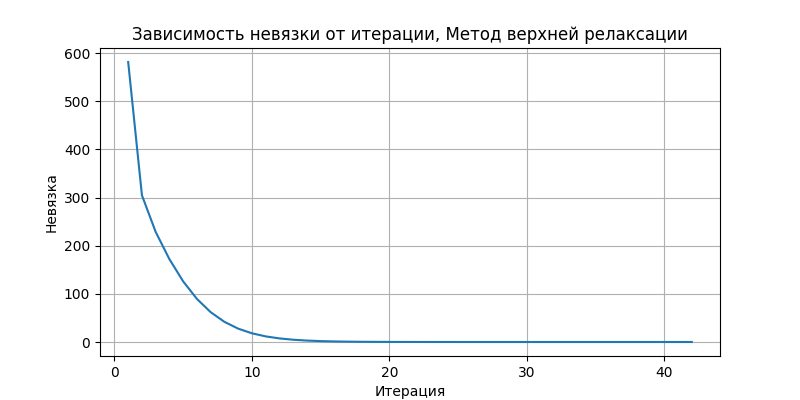

[[100.00000096]
 [ 98.99999759]
 [ 98.00000072]
 [ 96.99999979]
 [ 96.00000006]
 [ 94.99999998]
 [ 94.        ]
 [ 93.        ]
 [ 92.        ]
 [ 91.        ]
 [ 90.        ]
 [ 89.        ]
 [ 88.        ]
 [ 87.        ]
 [ 86.        ]
 [ 85.        ]
 [ 84.        ]
 [ 83.        ]
 [ 82.        ]
 [ 81.        ]
 [ 80.        ]
 [ 79.        ]
 [ 78.        ]
 [ 77.        ]
 [ 76.        ]
 [ 75.        ]
 [ 74.        ]
 [ 73.        ]
 [ 72.        ]
 [ 71.        ]
 [ 70.        ]
 [ 69.        ]
 [ 68.        ]
 [ 67.        ]
 [ 66.        ]
 [ 65.        ]
 [ 64.        ]
 [ 63.        ]
 [ 62.        ]
 [ 61.        ]
 [ 60.        ]
 [ 59.        ]
 [ 58.        ]
 [ 57.        ]
 [ 56.        ]
 [ 55.        ]
 [ 54.        ]
 [ 53.        ]
 [ 52.        ]
 [ 51.        ]
 [ 50.        ]
 [ 49.        ]
 [ 48.        ]
 [ 47.        ]
 [ 46.        ]
 [ 45.        ]
 [ 44.        ]
 [ 43.        ]
 [ 42.        ]
 [ 41.        ]
 [ 40.        ]
 [ 39.        ]
 [ 38.  

In [15]:
u0 = np.zeros((n, 1))
u, k = sor(A, F, u0)

print(np.dot(A, u), k)

In [16]:
def gradient_descent(A, F, u0, eps=1e-6, max_iter=100):
    """
    Реализует метод градиентного спуска для решения системы Au = F.

    Args:
        A:          Матрица коэффициентов системы (numpy.ndarray).
        F:          Вектор свободных членов (numpy.ndarray).
        u0:         Начальное приближение к решению.
        eps:        Точность, с которой ищется решение.
        max_iter:   Максимальное количество итераций.

    Returns:
        Вектор решений системы (numpy.ndarray) или None.
        Количество выполненных итераций.
    """

    n = A.shape[0]

    u = u0.copy()
    r = np.zeros((n, 1))

    r_arr = []

    for k in range(max_iter):
        r = F - np.dot(A, u)
        tau = np.dot(r.T, r) / np.dot(np.dot(A, r).T, r)

        r_arr.append(np.linalg.norm(r))

        u_prev = u.copy()
        u = u_prev + tau * r 

        if np.linalg.norm(u - u_prev) < eps:
            break

    plot_r(r_arr, "Метод градиентного спуска")

    return u, k

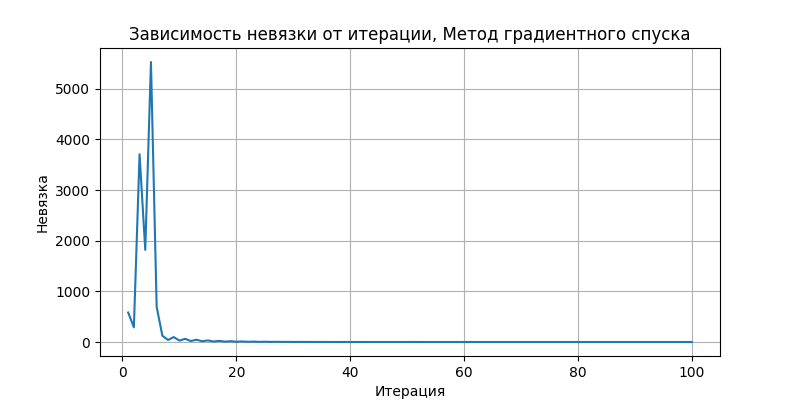

[[100.00002197]
 [ 99.00000629]
 [ 98.00000677]
 [ 97.00000558]
 [ 96.00000472]
 [ 95.00000397]
 [ 94.00000334]
 [ 93.00000282]
 [ 92.0000024 ]
 [ 91.00000208]
 [ 90.00000183]
 [ 89.00000164]
 [ 88.0000015 ]
 [ 87.00000139]
 [ 86.00000132]
 [ 85.00000127]
 [ 84.00000123]
 [ 83.0000012 ]
 [ 82.00000118]
 [ 81.00000116]
 [ 80.00000114]
 [ 79.00000112]
 [ 78.00000111]
 [ 77.00000109]
 [ 76.00000108]
 [ 75.00000107]
 [ 74.00000105]
 [ 73.00000104]
 [ 72.00000102]
 [ 71.00000101]
 [ 70.00000099]
 [ 69.00000098]
 [ 68.00000097]
 [ 67.00000095]
 [ 66.00000094]
 [ 65.00000092]
 [ 64.00000091]
 [ 63.0000009 ]
 [ 62.00000088]
 [ 61.00000087]
 [ 60.00000085]
 [ 59.00000084]
 [ 58.00000082]
 [ 57.00000081]
 [ 56.0000008 ]
 [ 55.00000078]
 [ 54.00000077]
 [ 53.00000075]
 [ 52.00000074]
 [ 51.00000072]
 [ 50.00000071]
 [ 49.0000007 ]
 [ 48.00000068]
 [ 47.00000067]
 [ 46.00000065]
 [ 45.00000064]
 [ 44.00000063]
 [ 43.00000061]
 [ 42.0000006 ]
 [ 41.00000058]
 [ 40.00000057]
 [ 39.00000055]
 [ 38.00

In [17]:
u0 = np.zeros((n, 1))
u, k = gradient_descent(A, F, u0)

print(np.dot(A, u), k)

In [23]:
def minimal_residuals(A, F, u0, eps=1e-6, max_iter=100):
    """
    Реализует метод минимальных невязок для решения системы Au = F.

    Args:
        A:          Матрица коэффициентов системы (numpy.ndarray).
        F:          Вектор свободных членов (numpy.ndarray).
        u0:         Начальное приближение к решению.
        eps:        Точность, с которой ищется решение.
        max_iter:   Максимальное количество итераций.

    Returns:
        Вектор решений системы (numpy.ndarray) или None.
        Количество выполненных итераций.
    """

    n = A.shape[0]
    u = u0.copy()

    r_arr = []

    for k in range(max_iter):
        r = F - np.dot(A, u)
        r_arr.append(np.linalg.norm(r))

        p = np.dot(A, r)
        tau = np.dot(p.T, r) / np.dot(p.T, p)

        u_prev = u.copy()
        u = u_prev + tau * r

        if np.linalg.norm(u - u_prev) < eps:
            break

    plot_r(r_arr, "Метод минимальных невязок")

    return u, k

In [52]:
A = np.array(([4, -3, 0],
               [-3, 16, 6], 
               [0, 6, 4]))
F = np.array(([4], [3], [4]))

u0 = np.array(([4], [1], [0]))
# u, k = minimal_residuals(A, F, u0)

r0 = F - np.dot(A, u0)
Ar0 = np.dot(A, r0)
tau0 = np.dot(Ar0.T, r0)/np.dot(Ar0.T, Ar0)

u1 = u0 + tau0[0][0]*r0
u1

r1 = F - np.dot(A, u1)
Ar1 = np.dot(A, r1)
tau1 = np.dot(Ar1.T, r1)/np.dot(Ar1.T, Ar1)

u2 = u1 + tau1[0][0]*r1
u2


array([[ 1.718507  ],
       [ 0.74650078],
       [-0.50699844]])

In [20]:
def stabilized_bicgstab(A, F, u0, eps=1e-6, max_iter=100):
    """
    Реализует стабилизированный метод бисопряженных градиентов для решения системы Au = F.

    Args:
        A:          Матрица коэффициентов системы (numpy.ndarray).
        F:          Вектор свободных членов (numpy.ndarray).
        u0:         Начальное приближение к решению.
        eps:        Точность, с которой ищется решение.
        max_iter:   Максимальное количество итераций.

    Returns:
        Вектор решений системы (numpy.ndarray) или None.
        Количество выполненных итераций.
    """

    n = A.shape[0]
    
    r_arr = []

    n = A.shape[0]
    u = u0.copy()
    r = F - np.dot(A, u)
    r_prev = r.copy()

    # Первая итерация
    tau_1 = np.dot(r.T, r) / np.dot(np.dot(A, r).T, r)
    u = (np.eye(n) - tau_1 * A) @ u + tau_1 * F

    # Счетчик итераций
    alpha_k = 1
    tau_k = tau_1
    k = 1

    while k < max_iter:
        r = F - np.dot(A, u)
        r_arr.append(np.linalg.norm(r))

        # Вычисление коэффициентов tau и alpha
        tau_k1 = np.dot(r.T, r) / np.dot(np.dot(A, r).T, r)
        alpha_k1 = (1 - 1 / alpha_k * tau_k1 / tau_k * np.dot(r.T, r) / np.dot(np.dot(A, r_prev).T, r_prev)) ** -1

        # Обновление решения
        u_prev = u.copy()
        u = alpha_k1 * (np.eye(n) - tau_k1 * A) @ u + (1 - alpha_k1) * u_prev + alpha_k1 * tau_k1 * F

        # Проверка критерия остановки
        if np.linalg.norm(u - u_prev) < eps:
            break

        # Обновление значений для следующей итерации
        r_prev = r.copy()
        tau_k = tau_k1
        alpha_k = alpha_k1
        k += 1

    plot_r(r_arr, "Стабилизированный метод бисопряженных градиентов")

    return u, k

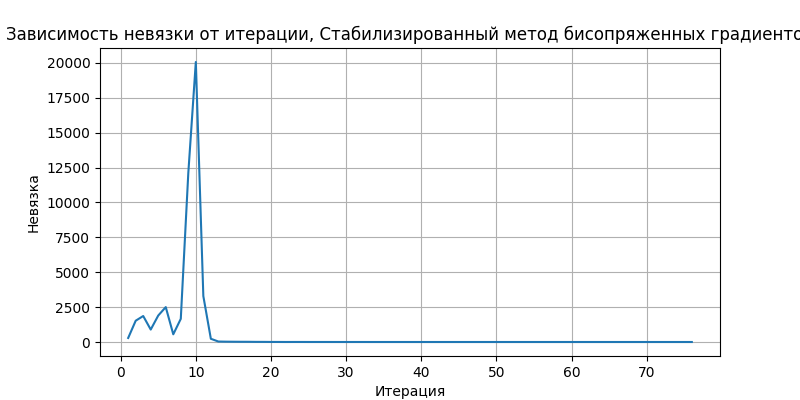

[[99.99999542]
 [98.99999955]
 [97.99999894]
 [96.99999891]
 [95.99999887]
 [94.9999989 ]
 [93.99999898]
 [92.9999991 ]
 [91.99999926]
 [90.99999943]
 [89.9999996 ]
 [88.99999975]
 [87.99999989]
 [86.99999999]
 [86.00000006]
 [85.0000001 ]
 [84.00000012]
 [83.00000011]
 [82.0000001 ]
 [81.00000007]
 [80.00000005]
 [79.00000003]
 [78.00000002]
 [77.00000001]
 [76.00000001]
 [75.00000001]
 [74.00000001]
 [73.00000001]
 [72.00000002]
 [71.00000002]
 [70.00000002]
 [69.00000002]
 [68.00000002]
 [67.00000002]
 [66.00000002]
 [65.00000002]
 [64.00000002]
 [63.00000002]
 [62.00000001]
 [61.00000001]
 [60.00000001]
 [59.00000001]
 [58.00000001]
 [57.00000001]
 [56.00000001]
 [55.00000001]
 [54.00000001]
 [53.00000001]
 [52.00000001]
 [51.00000001]
 [50.00000001]
 [49.00000001]
 [48.00000001]
 [47.00000001]
 [46.00000001]
 [45.00000001]
 [44.00000001]
 [43.00000001]
 [42.00000001]
 [41.00000001]
 [40.00000001]
 [39.00000001]
 [38.00000001]
 [37.00000001]
 [36.00000001]
 [35.00000001]
 [34.00000

In [21]:
u0 = np.zeros((n, 1))
u, k = stabilized_bicgstab(A, F, u0)

print(np.dot(A, u), k)